In [30]:
# Load Packages
import pandas as pd
import numpy as np

#Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.simplefilter('ignore')

In [31]:
data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud Detection using ML/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
data.shape

(284807, 31)

## 1. Data Preparation

**Checking for Missing Values**

In [35]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*There is no Null value present in the dataset*

**Checking for Duplicate values**

In [36]:
data.duplicated().any()

True

In [37]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [38]:
# drop duplicate entries
data = data.drop_duplicates()

In [39]:
data.duplicated().any()

False

## 2. Exploratory Data Analysis (EDA)

In [40]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [41]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

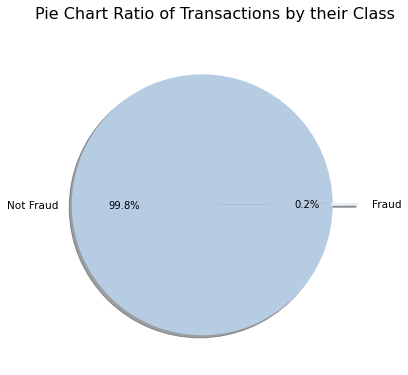

In [42]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

fraud =len(data[data['Class']==1])
notfraud = len(data[data['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=(0.1, 0.1), labels=labels, colors=sns.color_palette("BuPu"),
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Pie Chart Ratio of Transactions by their Class\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)
plt.show()

*The dataset is highly unbalanced, the positive class (frauds) account for only 0.2% of all transactions.*

In [43]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


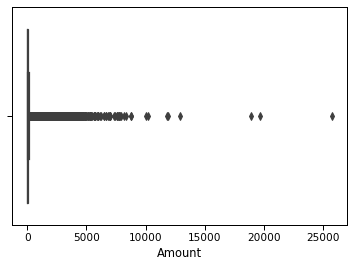

In [44]:
sns.boxplot(data['Amount'])

*We can observe that BMI has so many outliers and since the data is not normally distributed we need to use IQR techniue to handle the outliers.*

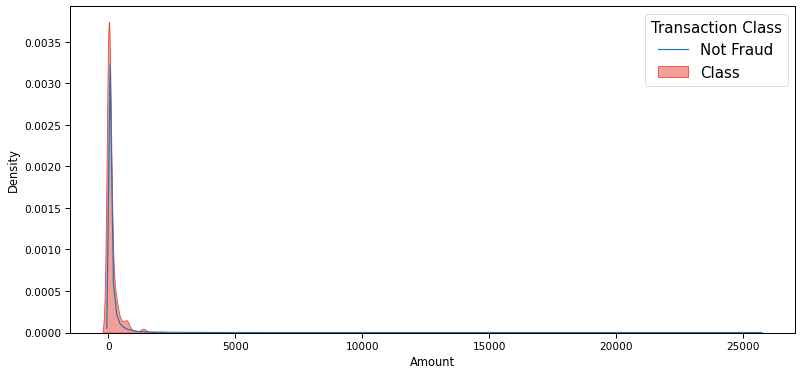

In [45]:
plt.figure(figsize=(13,6))
sns.kdeplot(data[data["Class"]== 0]["Amount"], label="Not Fraud")
sns.kdeplot(data[data["Class"]== 1]["Amount"], alpha=0.5,shade = True, color="#ea4335", label="Class")
plt.legend(title='Transaction Class', fontsize=15, title_fontsize=15)
plt.show()


## 3. Feature Engineering

**Outlier Detection**

In [46]:
# Outlier treatment for Amount

Q1 = data.Amount.quantile(0.25)
Q3 = data.Amount.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Amount >= Q1 - 1.5*IQR) & (data.Amount <= Q3 + 1.5*IQR)]

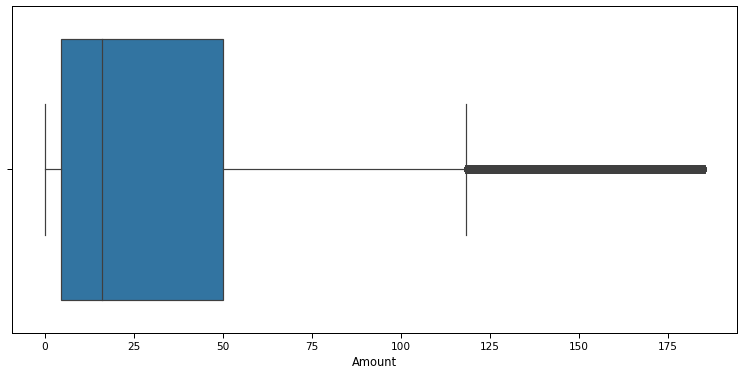

In [47]:
# Outlier Analysis after treatment
plt.figure(figsize=(13,6))
sns.boxplot(data['Amount'])
plt.show()

### Feature Selection



**Pearson Correlation Test**

*Pearson correlation is used to measure how strong the relationship is between two variables.*

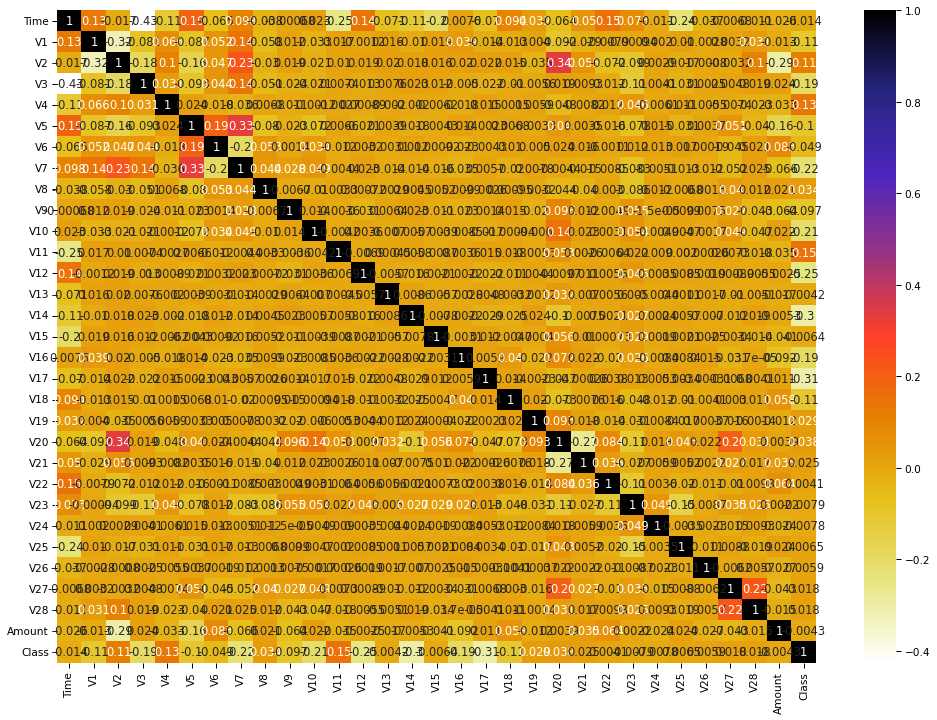

In [48]:
# Displaying Correlation between varaibles using heatmap

plt.figure(figsize=(17, 12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

*From the above plot, we can observe that no features are correlated with each other.*

### Data Transformation

**Robust Scaling**

In [49]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [50]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,2.935399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.293122
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,2.361459
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.185673
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.271589


In [51]:
data.shape

(252041, 30)

## 4. Data Pre-processing (Splitting & Balancing the dataset)

In [52]:
X = data.drop('Class', axis = 1)
y = data.Class

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 23)

## 5. Model Building & Evaluation

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### A. Fitting Decision Tree Classifier

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [58]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt))
print("ROCAUC-Score: ", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.9982992656642401
F1-Score:  0.9982953640274016
ROCAUC-Score:  0.9983004195563058
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63085
           1       1.00      1.00      1.00     62743

    accuracy                           1.00    125828
   macro avg       1.00      1.00      1.00    125828
weighted avg       1.00      1.00      1.00    125828



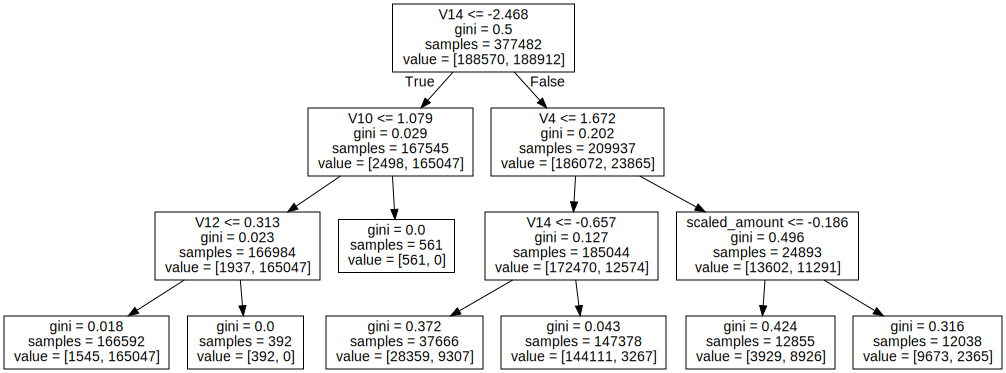

In [59]:
# Visulazing Decision Tree with Max Depth = 3

import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

### **Plotting Confusion Matrix**

Since the evaluation score (Accuracy score & F1-score) of Random Forest is highest, we can plot the confusion matrix for the result we got with Random Forest.

Text(85.7, 0.5, 'Truth')

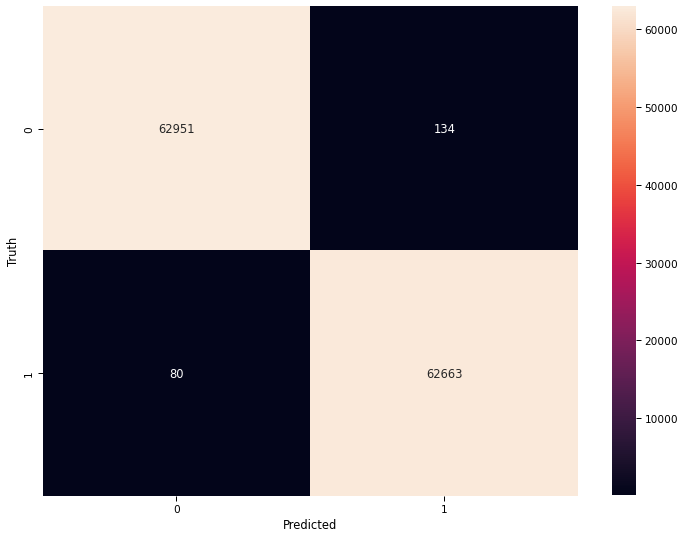

In [60]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
# saving the model 
import pickle 
pickle_out = open("/content/drive/MyDrive/Credit Card Fraud Detection using ML/Fraud Detection Model.pkl", mode = "wb") 
pickle.dump(dt, pickle_out) 
pickle_out.close()